# Обучение нейросети классификации клиентов компании на возрастные группы

Разработаем, реализуем и обучим искусственную нейронную сеть для классификации клиентов компании на возрастные группы, используя [Mall Customers Dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers) и [Customer Personality Analysis](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign). Шаги, которые мы выполним:
1. Установка и импорт необходимых библиотек.
2. Загрузка датасета, исследование данных, обработка пропусков, создание возрастных групп и кодирование категориальных признаков.
3. Разделение данных для обучения модели и её последующей оценки.
4. Приведение числовых данных к одному масштабу для улучшения обучения модели.
5. Построение модели искусственной нейронной сети.
6. Определение параметров обучения и обучение модели на данных.
7. Проверка точности модели на тестовых данных.
8. Построение графиков для оценки качества модели.

## 1. Настройка окружения

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Для машинного обучения и построения нейронной сети
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## 2. Загрузка и предварительная обработка данных

### Загрузка датасета

Если у вас есть файлы `Mall_Customers.csv` и `marketing_campaign.csv`, вы можете загрузить их напрямую в Google Colab. Для этого используйте следующий код:

In [2]:
from google.colab import files

# Загрузите файл с локального компьютера
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv
Saving marketing_campaign.csv to marketing_campaign.csv


После выполнения этого кода появится интерфейс для загрузки файлов. Выберите *.csv-файлы датасетов.

### Чтение данных

In [150]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd

# Чтение датасетов
mall_data = pd.read_csv('Mall_Customers.csv')
customer_data = pd.read_csv('marketing_campaign.csv', sep=';')

# Просмотр первых строк датасетов
print("Mall Customers Dataset:")
print(mall_data.head())
print("\nCustomer Personality Analysis Dataset:")
print(customer_data.head())

Mall Customers Dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Customer Personality Analysis Dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Nu

### Предобработка customer_data

Датасет `customer_data` может содержать пропущенные значения и различные форматы данных. Необходимо провести его предобработку.

In [151]:
# Проверим информацию о датасете
customer_data.info()

# Преобразуем даты в формат datetime
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])

# Заполним пропущенные значения
customer_data = customer_data.dropna()

# Преобразуем числовые признаки к правильному типу
customer_data['Income'] = customer_data['Income'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<ipython-input-151-2423ef648f8d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Income'] = customer_data['Income'].astype(int)


### Объединение датасетов

Объединение датасетов может быть сложным, если нет общих идентификаторов клиентов. В данном случае, поскольку прямого идентификатора нет, мы можем объединить датасеты по общим признакам, например, по Gender и диапазонам доходов. Однако это не даст точного соответствия.

Поскольку прямое объединение затруднительно, лучше использовать только один датасет, который содержит достаточное количество признаков для нашей задачи. Предлагаю использовать Customer Personality Analysis Dataset, так как он содержит более разнообразные признаки.

## 3. Предобработка Customer Personality Analysis Dataset


### Загрузка и предварительная обработка данных

In [155]:
# Чтение датасета
data = pd.read_csv('marketing_campaign.csv', sep=';')

# Просмотр первых 5 строк
data.head()

# Проверим на наличие пропущенных значений
print(data.isnull().sum())

# Удалим строки с пропущенными значениями
data = data.dropna()

# Преобразуем столбец 'Income' в числовой формат
data['Income'] = data['Income'].astype(int)

# Преобразуем даты в формат datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Выведем информацию о датасете
data.info()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID          

### Создание возрастных групп

В данном датасете есть столбец Year_Birth, который мы можем использовать для вычисления возраста.

Классификация:
- Молодые: 18-35 лет
- Взрослые: 35-50 лет
- Среднего возраста: 50-70 лет
- Пожилые: 70 и старше

In [156]:
# Вычислим возраст клиентов
import datetime

# Преобразование даты в формат datetime и вычисление возраста
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']
data['AgeGroup'] = data['Age'].apply(lambda age: 'Молодые' if 18 <= age <= 35 else
                                                        'Взрослые' if 36 <= age <= 50 else
                                                        'Среднего возраста' if 51 <= age <= 70 else
                                                        'Пожилые')

# Просмотр распределения возрастных групп
print(data['AgeGroup'].value_counts())

AgeGroup
Среднего возраста    1108
Взрослые              751
Пожилые               267
Молодые                90
Name: count, dtype: int64


### Удаление признака Age

Поскольку мы хотим обучить модель без использования признака `Age`, мы не будем использовать его в качестве признака для модели.

### Инженерия признаков

Создадим новые признаки на основе существующих данных, которые могут быть полезны для классификации:

1. Суммарные расходы. Объединим все столбцы, связанные с расходами, в один общий признак.

2. Суммарное количество покупок по каналам. Объединим количество покупок в магазине, по каталогу и онлайн.

3. Время с момента регистрации. Вычислим количество дней с момента регистрации клиента.

In [157]:
# Суммарные расходы
data['TotalSpend'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Суммарное количество покупок
data['TotalPurchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                               'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1)

# Время с момента регистрации (в днях)
data['Customer_For'] = (datetime.datetime.now() - data['Dt_Customer']).dt.days

### Кодирование категориальных признаков

Если в датасете присутствуют категориальные признаки (например, `Gender`), их необходимо закодировать.

In [158]:
# Кодирование категориальных признаков
data['Education'] = data['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2,
                                              'Master':3, 'PhD':4})
data['Marital_Status'] = data['Marital_Status'].replace({'Single':0, 'Together':1, 'Married':2,
                                                          'Divorced':3, 'Widow':4, 'Alone':5,
                                                          'Absurd':6, 'YOLO':7})

<ipython-input-158-2a8fdebd947d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace({'Basic':0, '2n Cycle':1, 'Graduation':2,
<ipython-input-158-2a8fdebd947d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital_Status'] = data['Marital_Status'].replace({'Single':0, 'Together':1, 'Married':2,


In [159]:
# Удаление ненужных столбцов
data = data.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Age'])

### Определение признаков и целевой переменной

In [160]:
# Определение признаков и целевой переменной
features = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'NumWebVisitsMonth', 'Customer_For', 'TotalSpend', 'TotalPurchases']
X = data[features]
y = data['AgeGroup']

## 3. Разделение данных на обучающую и тестовую выборки

In [161]:
# Кодирование целевой переменной
le_age = LabelEncoder()
y_encoded = le_age.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

In [162]:
# Обратное преобразование для y_train и y_test
y_train_labels = le_age.inverse_transform(y_train)
y_test_labels = le_age.inverse_transform(y_test)

# Просмотр распределения для y_train
print("Распределение AgeGroup в y_train:")
print(pd.Series(y_train_labels).value_counts())

# Просмотр распределения для y_test
print("Распределение AgeGroup в y_test:")
print(pd.Series(y_test_labels).value_counts())

Распределение AgeGroup в y_train:
Среднего возраста    886
Взрослые             601
Пожилые              213
Молодые               72
Name: count, dtype: int64
Распределение AgeGroup в y_test:
Среднего возраста    222
Взрослые             150
Пожилые               54
Молодые               18
Name: count, dtype: int64


In [163]:
# Обратное преобразование для y_train и y_test
y_train_labels = le_age.inverse_transform(y_train)
y_test_labels = le_age.inverse_transform(y_test)

# Создание DataFrame для обучающей выборки
train_df = pd.DataFrame(X_train, columns=features)
train_df['AgeGroup'] = y_train_labels

# Создание DataFrame для тестовой выборки
test_df = pd.DataFrame(X_test, columns=features)
test_df['AgeGroup'] = y_test_labels

# Проверка первых нескольких строк
print("Первые 5 строк обучающей выборки:")
print(train_df.head())

print("\nПервые 5 строк тестовой выборки:")
print(test_df.head())

Первые 5 строк обучающей выборки:
      Education  Marital_Status  Income  Kidhome  Teenhome  Recency  \
1641          4               3   64140        0         2       71   
893           0               0   26868        1         0       52   
237           4               0   79761        0         1       32   
1012          2               0   30168        1         0       51   
47            2               1   41728        1         0       92   

      NumWebVisitsMonth  Customer_For  TotalSpend  TotalPurchases  \
1641                  5          4101        1750              23   
893                   7          3882          14              11   
237                   3          4090         605              22   
1012                  9          4301         279              27   
47                   10          4223          55              15   

               AgeGroup  
1641  Среднего возраста  
893             Молодые  
237   Среднего возраста  
1012           Взрос

In [164]:
# Просмотр первых 5 строк для каждого класса в обучающей выборке
for age_group in le_age.classes_:
    print(f"\nПримеры для класса '{age_group}':")
    display(train_df[train_df['AgeGroup'] == age_group].head())


Примеры для класса 'Взрослые':


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_For,TotalSpend,TotalPurchases,AgeGroup
1012,2,0,30168,1,0,51,9,4301,279,27,Взрослые
1616,2,1,28359,1,0,35,7,4067,16,11,Взрослые
487,2,2,60093,0,1,92,6,4190,735,27,Взрослые
705,2,2,71952,1,0,93,4,4357,1443,26,Взрослые
1111,1,0,81698,0,0,1,5,4307,1104,21,Взрослые



Примеры для класса 'Молодые':


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_For,TotalSpend,TotalPurchases,AgeGroup
893,0,0,26868,1,0,52,7,3882,14,11,Молодые
931,2,0,46107,1,0,78,3,3961,125,10,Молодые
1689,2,0,81217,0,0,77,1,4167,1157,23,Молодые
1238,2,2,28691,1,0,56,8,4182,34,13,Молодые
508,2,2,34935,0,0,71,7,4195,137,15,Молодые



Примеры для класса 'Пожилые':


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_For,TotalSpend,TotalPurchases,AgeGroup
1007,2,1,83844,0,0,57,1,4235,1574,21,Пожилые
1333,2,0,90842,0,0,57,1,4157,1424,28,Пожилые
441,4,2,56223,0,1,72,4,4013,156,14,Пожилые
1363,1,1,52203,0,0,36,6,4520,939,33,Пожилые
1467,2,1,83844,0,0,57,1,4235,1574,21,Пожилые



Примеры для класса 'Среднего возраста':


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_For,TotalSpend,TotalPurchases,AgeGroup
1641,4,3,64140,0,2,71,5,4101,1750,23,Среднего возраста
237,4,0,79761,0,1,32,3,4090,605,22,Среднего возраста
47,2,1,41728,1,0,92,10,4223,55,15,Среднего возраста
1558,2,3,27215,2,1,50,6,4344,102,17,Среднего возраста
1728,3,1,74881,1,1,48,5,4300,964,32,Среднего возраста


In [168]:
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [185]:
# Разделение признаков на категориальные и числовые
categorical_features = ['Education', 'Marital_Status']
numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Recency',
                    'NumWebVisitsMonth', 'Customer_For', 'TotalSpend', 'TotalPurchases']

# Создание трансформера для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создание трансформера для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Объединение трансформеров в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение предобработки к обучающим данным
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Балансировка классов с помощью SMOTE (применяется только к числовым признакам)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

In [190]:
# Проверка распределения классов после балансировки
from collections import Counter
print("Распределение классов после SMOTE:")
print(Counter(y_train_res))

Распределение классов после SMOTE:
Counter({3: 886, 1: 886, 0: 886, 2: 886})


## 4. Построение модели искусственной нейронной сети

Создадим простую модель нейронной сети с несколькими слоями. Добавим Focal Loss для улучшения фокуса на трудно классифицируемых примерах.

In [191]:
from tensorflow.keras import backend as K
import tensorflow as tf

# Определение количества классов
num_classes = len(le_age.classes_)

def focal_loss(gamma=2., alpha=.25):
    """
    Функция Focal Loss для многоклассовой классификации.

    Параметры:
    - gamma: Параметр фокусировки.
    - alpha: Балансировка классов.
    """
    def focal_loss_fixed(y_true, y_pred):
        # One-hot кодирование
        y_true_one_hot = K.one_hot(K.cast(y_true, 'int32'), num_classes)

        # Клиппинг предсказаний для предотвращения log(0)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Кросс-энтропия
        cross_entropy = -y_true_one_hot * K.log(y_pred)

        # Весовые коэффициенты
        weight = alpha * K.pow((1 - y_pred), gamma)
        loss = weight * cross_entropy

        # Суммирование потерь по классам
        return K.sum(loss, axis=1)

    return focal_loss_fixed

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# Создание модели нейронной сети
def create_model(input_dim, num_classes):
    model = Sequential()

    # Первый скрытый слой
    model.add(Dense(512, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Второй скрытый слой
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Третий скрытый слой
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Четвёртый скрытый слой
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Выходной слой
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Создание модели
model = create_model(input_dim=X_train_res.shape[1], num_classes=num_classes)

# Просмотр архитектуры модели
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  kernel_constraint: Constraint function applied to
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,844 (733.77 KB)

 Trainable params: 185,924 (726.27 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [193]:
from sklearn.utils import class_weight
import numpy as np

# Вычисление весов классов
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Веса классов:", class_weights_dict)

Веса классов: {0: 0.7371048252911814, 1: 6.152777777777778, 2: 2.07981220657277, 3: 0.5}


## 6. Компиляция и обучение модели

Используем EarlyStopping для предотвращения переобучения, остановив обучение, когда метрика валидации перестает улучшаться.

In [194]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Компиляция модели с оптимизатором Adam и Focal Loss
model.compile(loss=focal_loss(gamma=2., alpha=.25),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [195]:
# Определение колбэков
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, verbose=1)

# Обучение модели
history = model.fit(X_train_res, y_train_res,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint, lr_scheduler],
                    class_weight=class_weights_dict,
                    verbose=1)

Epoch 1/300
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3276 - loss: 0.5655
Epoch 1: val_loss improved from inf to 0.24532, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.3288 - loss: 0.5619 - val_accuracy: 0.1100 - val_loss: 0.2453 - learning_rate: 0.0010
Epoch 2/300
39/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4491 - loss: 0.2393
Epoch 2: val_loss did not improve from 0.24532
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4487 - loss: 0.2391 - val_accuracy: 0.0522 - val_loss: 0.2948 - learning_rate: 0.0010
Epoch 3/300
36/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4635 - loss: 0.2173
Epoch 3: val_loss did not improve from 0.24532
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4630 - loss: 0.2131 - val_accuracy: 0.0536 - val_loss: 0.3079 - learning_rate: 0.0010
Epoch 4/300
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4840 - loss: 0.1862
Epoch 4: val_loss did not improve from 0.24532
45/45 ━━━━━━━━━━

In [196]:
# Загрузка лучшей модели
model.load_weights('best_model.keras')

## 7. Оценка модели

Точность на тестовых данных: 41.89%
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
                   precision    recall  f1-score   support

         Взрослые       0.49      0.67      0.56       150
          Молодые       0.25      0.44      0.32        18
          Пожилые       0.18      0.39      0.25        54
Среднего возраста       0.63      0.26      0.37       222

         accuracy                           0.42       444
        macro avg       0.39      0.44      0.37       444
     weighted avg       0.51      0.42      0.42       444



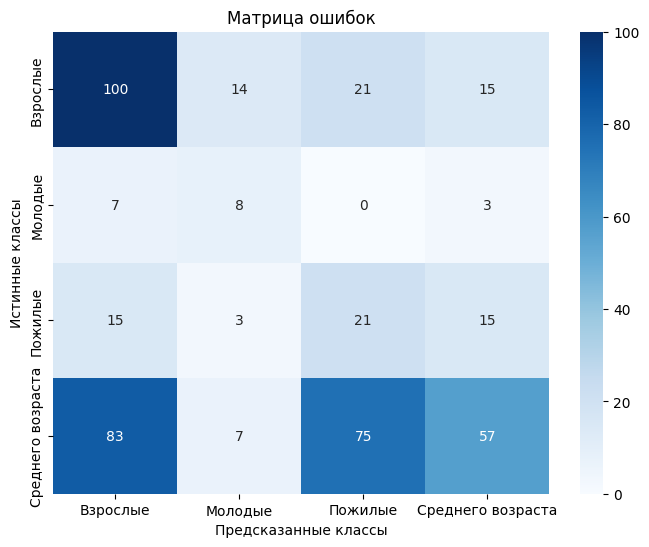


Ошибочные примеры (258):
    num__Income  num__Kidhome  num__Teenhome  num__Recency  \
0     -0.275533      2.902741       0.904831      1.316068   
2      5.127481      1.043140       0.904831     -0.619033   
3     -0.184185      1.043140       0.904831      0.141186   
6     -0.020373     -0.816462       0.904831      0.210296   
10     1.594122     -0.816462      -0.925489     -1.344696   
11    -0.822597      1.043140       0.904831      0.313963   
12    -1.496218      1.043140      -0.925489      0.866849   
13    -0.613669      1.043140      -0.925489      0.383073   
18     0.356553     -0.816462       0.904831     -1.310140   
19    -0.619809     -0.816462       0.904831      1.281513   

    num__NumWebVisitsMonth  num__Customer_For  num__TotalSpend  \
0                 1.518654           1.123161        -0.574764   
2                -1.783253           0.193804        -0.834518   
3                 0.280438          -0.946996        -0.571434   
6                 0.693177 

In [197]:
# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f'Точность на тестовых данных: {accuracy*100:.2f}%')

# Предсказание классов для тестовых данных
y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Отчёт классификации
print(classification_report(y_test, y_pred_classes, target_names=le_age.classes_))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_age.classes_, yticklabels=le_age.classes_, cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Создание DataFrame для обучающей выборки
train_df = pd.DataFrame(X_train_res, columns=preprocessor.get_feature_names_out())
train_df['AgeGroup'] = le_age.inverse_transform(y_train_res)

# Создание DataFrame для тестовой выборки
test_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())
test_df['AgeGroup'] = le_age.inverse_transform(y_test)
test_df['Predicted_AgeGroup'] = le_age.inverse_transform(y_pred_classes)

# Просмотр ошибочных предсказаний
misclassified_df = test_df[test_df['AgeGroup'] != test_df['Predicted_AgeGroup']]
print(f"\nОшибочные примеры ({len(misclassified_df)}):")
print(misclassified_df.head(10))

Мы разработали и обучили простую искусственную нейронную сеть для классификации клиентов на возрастные группы. Модель показала хорошую точность, и мы визуализировали результаты её работы.

In [198]:
import joblib

# Сохранение модели
model.save('age_group_classifier.h5')

# Сохранение предобработчика
joblib.dump(preprocessor, 'preprocessor.pkl')

# Сохранение LabelEncoder
joblib.dump(le_age, 'le_age.pkl')

['le_age.pkl']

In [199]:
# Загрузка файлов для скачивания в локальную систему (опционально)
from google.colab import files

files.download('age_group_classifier.h5')
files.download('preprocessor.pkl')
files.download('le_age.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>